In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# distanve
import gower

# 
import importlib
import utils
importlib.reload(utils)
import preprocessing
importlib.reload(preprocessing)
# preprocessing tools
from sklearn.preprocessing import MinMaxScaler, RobustScaler


# methods to remove
from sklearn.ensemble import IsolationForest

sns.set_palette('Set2')

In [22]:
# Load data
df = preprocessing.load_dataset()

# visualize dataset

In [23]:
# no missing values
df.isnull().sum()

Dim_0       0
Dim_1=0     0
Dim_2=0     0
Dim_3=0     0
Dim_4=0     0
Dim_5=0     0
Dim_6=0     0
Dim_7=0     0
Dim_8=0     0
Dim_9=0     0
Dim_10=0    0
Dim_11=0    0
Dim_12=0    0
Dim_13=0    0
Dim_14=0    0
Dim_15=0    0
Dim_16      0
Dim_17      0
Dim_18      0
Dim_19      0
Dim_20      0
dtype: int64

In [24]:
## higly imbalanced binary variable columns
for column in df:
    if column[-2:] == '=0':
        #print(column)
        print(df[column].value_counts(), '\n')

Dim_1=0
1    5009
0    2191
Name: count, dtype: int64 

Dim_2=0
1    6260
0     940
Name: count, dtype: int64 

Dim_3=0
1    7089
0     111
Name: count, dtype: int64 

Dim_4=0
1    7108
0      92
Name: count, dtype: int64 

Dim_5=0
1    6924
0     276
Name: count, dtype: int64 

Dim_6=0
1    7122
0      78
Name: count, dtype: int64 

Dim_7=0
1    7099
0     101
Name: count, dtype: int64 

Dim_8=0
1    7079
0     121
Name: count, dtype: int64 

Dim_9=0
1    6728
0     472
Name: count, dtype: int64 

Dim_10=0
1    6705
0     495
Name: count, dtype: int64 

Dim_11=0
1    7109
0      91
Name: count, dtype: int64 

Dim_12=0
1    7141
0      59
Name: count, dtype: int64 

Dim_13=0
1    7016
0     184
Name: count, dtype: int64 

Dim_14=0
1    7199
0       1
Name: count, dtype: int64 

Dim_15=0
1    6848
0     352
Name: count, dtype: int64 


In [25]:
# Data is MinMax scaled
[(df[c].min(), df[c].max()) for c in df.columns]

[(0.0, 1.0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0)]

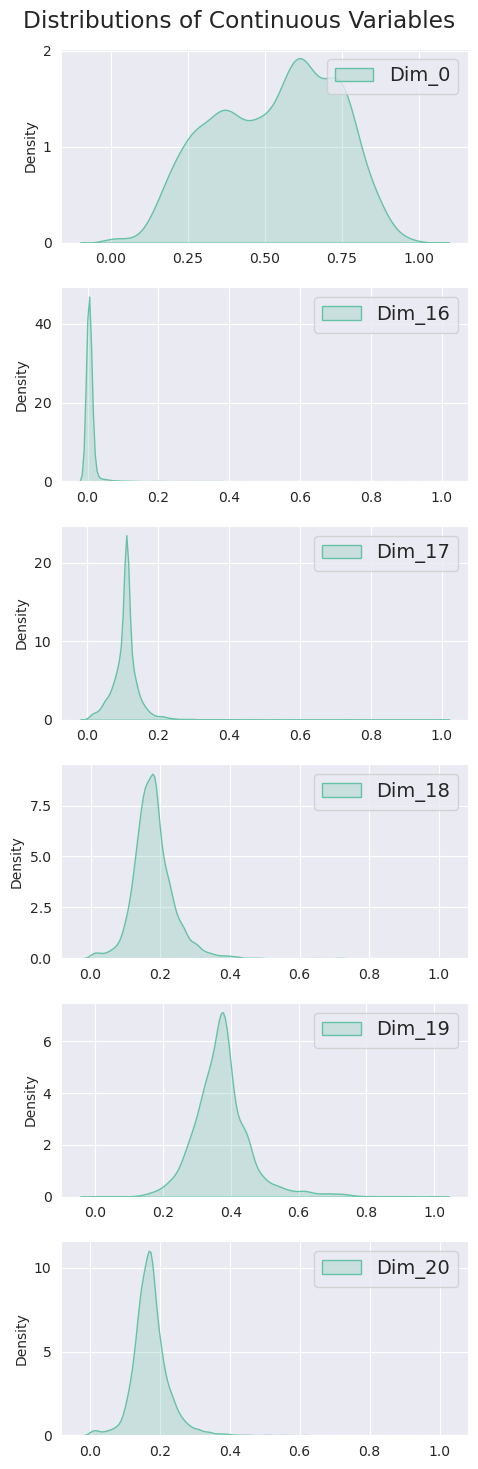

In [57]:
# plotting distributions of continuous variables
filtered_columns = [col for col in df.columns if col[-2:] != '=0']

# Set up a grid of subplots
fig, axes = plt.subplots(6, 1, figsize=(5, 15))
plt.rcParams.update({'font.size': 14})

axes = axes.flatten() # used to simplify the iteration over the subplots
for i, column in enumerate(filtered_columns):
    sns.kdeplot(df[column], fill=True, common_norm=False, label=f'{column}', ax=axes[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')
    axes[i].legend()

fig.suptitle('Distributions of Continuous Variables')
plt.tight_layout()
# Show the plot
plt.show()